<a href="https://colab.research.google.com/github/arnaldojr/cognitivecomputing/blob/master/material/aulas/lab02/atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivos da aula:**

*   Filtro negativo de imagem
*   Recorte da imagem
*   Seguimentação por pixel

In [1]:
%matplotlib inline
# Importando a biblioteca OpenCV
import cv2 

#import a biblioteca Numpy
import numpy as np

from matplotlib import pyplot as plt


print ("OpenCV Versão : %s " % cv2.__version__)

OpenCV Versão : 4.6.0 


In [ ]:
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/lab02/cogumelo.png" /content
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/lab02/droneinvertido.jpg" /content
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/lab02/drone.jpg" /content
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/lab02/droneinvertido.jpg" /content
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/lab02/goku.jpg" /content
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/lab02/gokuinvertido.jpg" /content
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/lab02/cogumelo.png" /content

--2023-02-16 20:27:45--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/lab02/cogumelo.png
Resolving raw.githubusercontent.com... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com|185.199.108.133|:443... connected.
Unable to establish SSL connection.
/content: Unsupported scheme.


## Filtro negativo (Inverte imagem)

Para aplicar um filtro negativo precisamos inverter os seus valores, ou seja, em uma imagem binária realizamos a troca de 0 pra 1 e de 1 para 0 para cada pixel da imagem. 

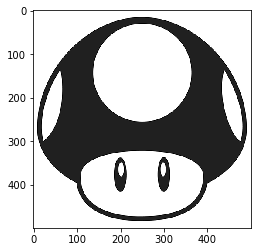

In [2]:
import cv2
imagem = cv2.imread("cogumelo.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

plt.imshow(image, interpolation="none", cmap="gray")
plt.show()

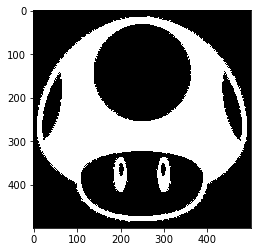

In [4]:
import cv2
imagem = cv2.imread("cogumelo.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

for y in range(0, image.shape[0]):
  for x in range(0, image.shape[1]):
    ##### aqui eu inverto o valor do pixel
    if image[y, x] == 255:
      image[y,x] = 0
    else:
      image[y,x] = 255

plt.imshow(image, interpolation="none", cmap="gray")
plt.show()

## Desafio 1

Faça uma implementação que inverte as cores de uma imagem em escala de cinza, com valores que vão de 0 ate 255. 
dica: a forma explicita de fazer uma inversãão é: a = 255 - a

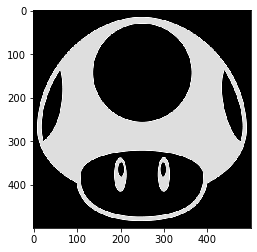

In [24]:
# implemente aqui sua solução
import cv2
imagem = cv2.imread("cogumelo.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

for y in range(0, image.shape[0]):
  for x in range(0, image.shape[1]):
    ##### aqui eu inverto o valor do pixel
    if image[y, x] == 255:
      image[y,x] = 0 - image[y,x]
    else:
      image[y,x] = 255 - image[y,x]

plt.imshow(image, interpolation="none", cmap="gray")
plt.show()





## Desafio 2 

Faça o mesmo par uma imagem colorida, realize a inversão de cores dos canais R, G e B. 

o resultado deve ser parecido com a imagem abaixo: 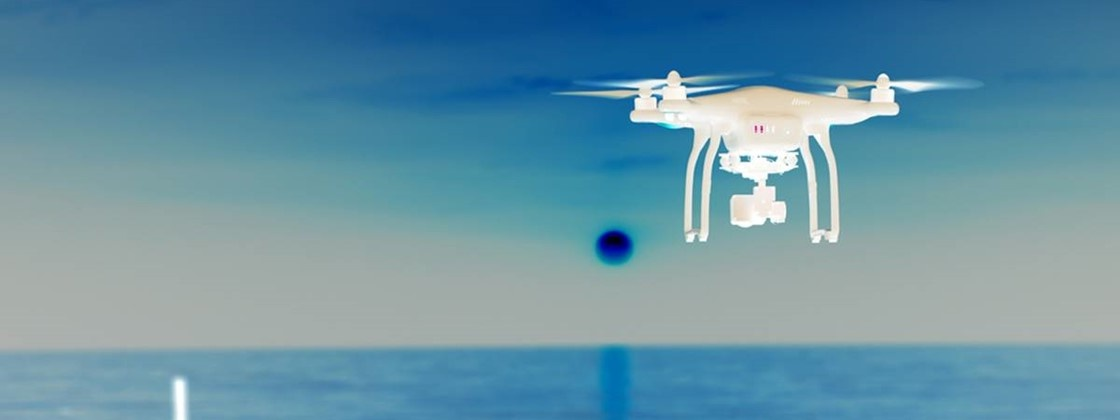


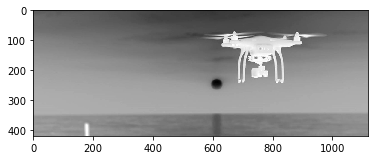

In [102]:
# Implemente aqui sua solução
import cv2
imagem = cv2.imread("droneinvertido.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.imshow(image, interpolation="none", cmap="gray")
plt.show()







## Recorte da imagem (crop)

O recorte de uma parte da imagem, ou crop, consiste em extrair da imagem uma região de interresse (ROI).

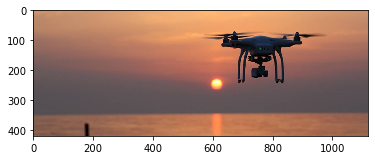

In [39]:
import cv2
imagem = cv2.imread("drone.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.imshow(image, interpolation="none")

plt.show()


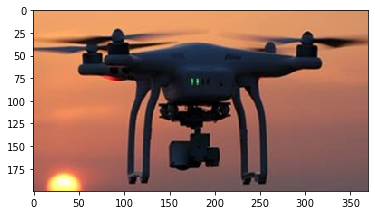

In [40]:
image2 = image.copy()

#crop_img = img[y:y+h, x:x+w]
image2 = image[50:250,580:950]

plt.imshow(image2, interpolation="none", cmap="gray")
plt.show()

## Desafio3

Ajude o nosso sayajin!! 

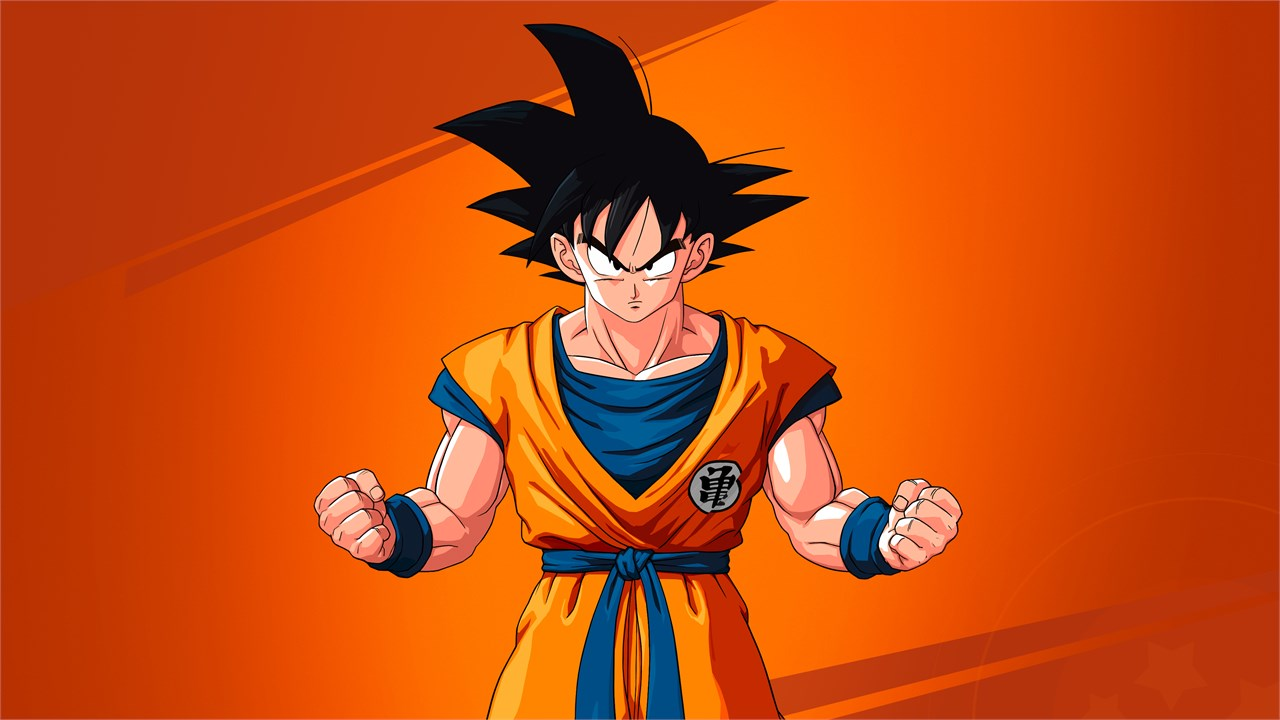

A imagem foi dividida em 4 quadrantes aleatorios e precisamos organizar essa bagunça. Faça a reconstrução da imagem nas posições corretas. 

Dica: Crie uma copia da imagem original (img2 = img.copy()), faça um crop da imagem 4 partes (crop1, crop2, crop3, crop4), junte as partes cortadas na ordem correta na img2. no final Salve a imagem (cv2.imwrite())

altura: 720 largura: 1280


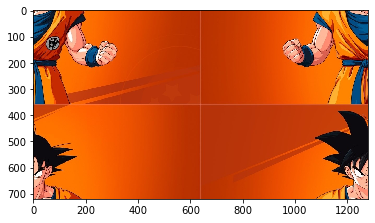

In [90]:
import cv2
imagem = cv2.imread("gokuinvertido.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

altura = image.shape[0]
largura = image.shape[1]

print("altura: {} largura: {}".format(altura, largura))



plt.imshow(image, interpolation="none")

plt.show()

# para salvar imagem
#cv2.imwrite("gokunormal.jpg", cv2.cvtColor(image2, cv2.COLOR_RGB2BGR))

altura: 720 largura: 1280


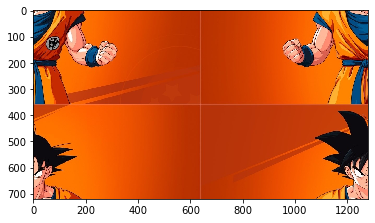

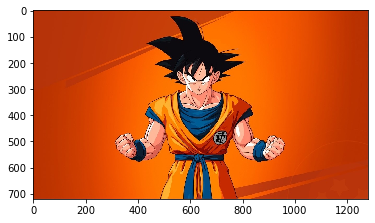

(720, 1280, 3)
(720, 1280, 3)


In [113]:
#implemente sua solução 

import cv2
imagem = cv2.imread("gokuinvertido.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

altura = image.shape[0]
largura = image.shape[1]

print("altura: {} largura: {}".format(altura, largura))

img2 = image.copy()

crop1 = image[int(altura/2):altura,int(largura/2):largura]
crop2 = image[int(altura/2):altura,0:int(largura/2)]
crop3 = image[0:360,640:1280]
#crop3 = image[0:int(altura/2):int(largura/2),largura]
crop4 = image[0:360,0:640]

img2[0:360,0:640] = crop1
img2[0:360,640:1280] = crop2
img2[360:720,0:640] = crop3
img2[360:720,640:1280] = crop4


plt.imshow(image, interpolation="none")
plt.show()
plt.imshow(img2, interpolation="none")
plt.show()

print(image.shape)
print(img2.shape)





## Seguimentação de imagens

Agora que sabemos como manipular pixel e como alterar seu valor e sua posição. Podemos fazer atividades mais complexas como conseguir reaalizar a seguimentação de algum objeto ou item da imagem (video), Como na imagem abaixo.

## Desafio 4 

De forma intuitiva realize algumas mudanças no código e veja o efeito que causa na imagem. Este exercio é apenas um aperitivo de algumas tecnicas que vamos estudar na proxima aula. 

(420, 1120, 3)


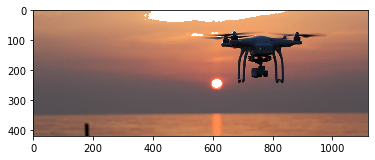

In [64]:
# Entenda o codigo e faça as alterações que achar necessárias
import cv2
imagem = cv2.imread("drone.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
print(image.shape)

for y in range(0, image.shape[0]):
  for x in range(0, image.shape[1]):
    if image[y,x,1] > 170 :
      image[y,x]= (255,255,255)
    

plt.imshow(image, interpolation="none")
plt.show()

## Desafio 5

Vamos tentar fazer o contrario, vamos tentar filtar o fundo da imagem sem o drone

(420, 1120, 3)


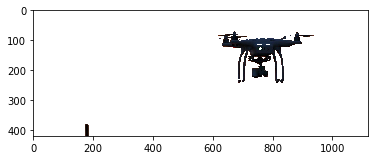

In [79]:
# Implemente seu código aqui

# Entenda o codigo e faça as alterações que achar necessárias
import cv2
imagem = cv2.imread("drone.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
print(image.shape)

for y in range(0, image.shape[0]):
  for x in range(0, image.shape[1]):
    if image[y,x,1] > 50 :
      image[y,x]= (255,255,255)
    

plt.imshow(image, interpolation="none")
plt.show()



